In [92]:
# https://app.flourish.studio/visualisation/6445004/edit
# Look at the above link for a network graph visualization
import numpy as np
## Util functions
## TODO ensure that this works in conjunction with the .get business
def get_dept_from_roll(roll):
    DEPTS = {"01":" Aerospace Engineering ","02":' Chemical Engineering ',"04":' Civil Engineering ',
             "05":' Computer Science & Engineering ',"07":' Electrical Engineering ',
             "10":' Mechanical Engineering ',"11":' Metallurgical Engineering & Materials Science ',
             "26":' Engineering Physics ',"03":' Chemistry ',"08":' Economics (HSS) ',
             "13":' Industrial Design Centre ',"17":' Energy Science and Engineering ',
             "35":' Random ',"30":' Random ',"09":' Random ','':" Random ","18":' Random ',"06":' Random ',
             "31":' Random '} 
    try:
        return DEPTS[roll[3:5]]
    except:
        print(roll)
        assert False

        
class Post(object):
    def __init__(self,author,subject,raw_text):
#         print(author,subject)
        self.author = re.findall(roll_number,author)[0]
        self.subject = re.findall(roll_number,subject)[0]
        self.raw_text = raw_text
        self.text,self.mentions = self.get_text_mentions(raw_text)
    
    def __str__(self):
        return f"{self.author} wrote the following about {self.subject} : \n {self.text}"
 
    def get_text_mentions(self,raw_text):
        # TODO
        return raw_text, None
    def asdict(self):
        return {"Author":self.author,"Subject":self.subject,"Text":self.text}


class Person(object):
    def __init__(self,**kwargs):
        self.id = kwargs['id'] 
        self.name = kwargs['Name']
        self.degree = kwargs['Degree']
        self.dept = kwargs['Department']
        if self.dept is None:
            self.dept = get_dept_from_roll(self.id)
        self.hostel = kwargs['Hostel']
        self.ibs = kwargs['IBs'] 
        self.gender = kwargs['Gender']
        self.posts_auth = []
        self.posts_subj = []
        self.posts_tagged = []
        
    def __str__(self):
        
        ibs_str = ", ".join(list(self.ibs))
        return f"Name: {self.name}, Program: {self.degree}, Dept: {self.dept}, Hostel: {self.hostel}, Clubs Associated with: {ibs_str}"
    
    def compute_post_stats(self):
        self.auth_len = np.mean([len(x.text.split()) for x in self.posts_auth])
        self.subj_len = np.mean([len(x.text.split()) for x in self.posts_subj])
        
    def asdict(self):
        return {"Name":self.name,"id":self.id,"Degree":self.degree,"Department":self.dept,"Hostel":self.hostel,
                "IBs":self.ibs,"Posts Auth":[x.asdict() for x in self.posts_auth],
                "Posts Subj":[x.asdict() for x in self.posts_subj]
               ,"Posts Tagged":[x.asdict() for x in self.posts_tagged]}


def get_dict_stats(d1,d2=None,num=1000,aggregate='median',desc=True):
    d3 = {}
    for k in d1:
        if d2 is not None:
            d3[k] = d1[k]/(d2[k] + 1e-10)
        else:
            if aggregate == 'median':
                d3[k] = np.median(d1[k])
            elif aggregate == 'mean':
                d3[k] = np.mean(d1[k])
            else:
                d3[k] = d1[k]
    d3 = (sorted(d3.items(), key=lambda item: item[1],reverse=desc))
    for i in range(min(num,len(d3))):
        print(d3[i][0],d3[i][1])


In [2]:
## Reading and loading the data
import json
import numpy as np
import matplotlib.pyplot as plt 
import csv

file = open("raw_data.json")
data = json.load(file)

## Converting to edge data
with open('edges.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['A','B','C'])
    for id in data:
        for post in data[id]["Posts Auth"]:
            spamwriter.writerow([id, post["Subject"], len(post["Text"])])

with open('depts.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['A','B'])
    for id in data:
        dept = data[id].get('Department') if 'Department' in data[id] else get_dept_from_roll(id)
        if len(data[id]["Posts Auth"]) or len(data[id]["Posts Auth"]):
            spamwriter.writerow([id, dept])

## Most popular person, simply looking at who has written the most
written_posts = {}
about_posts = {}
rolls = data.keys()
for id in data:
    written_posts[id] = len(data[id]['Posts Auth'])
for id in data:
    about_posts[id] = len(data[id]['Posts Subj'])

about_posts_sort = (sorted(about_posts.items(), key=lambda item: item[1],reverse=True))
written_posts_sort = (sorted(written_posts.items(), key=lambda item: item[1],reverse=True))
print("--------------------------")
print("Most written about")
print([x[0] for x in about_posts_sort[:10]])
print("Most authored")
print([x[0] for x in written_posts_sort[:10]])


## Average number of posts written and about
written = [written_posts[x] for x in rolls]
about   = [about_posts[x] for x in rolls]
print(f"Average posts written - {np.mean(written)},Average posts about - {np.mean(about)}")

## Scatter plot of posts written vs posts about
plt.scatter(written,about)
plt.show()

--------------------------
Most written about
['17D110013', '170110054', '170050056', '170010039', '170070028', '170070012', '17D100013', '170020025', '170020082', '170050094']
Most authored
['170110054', '17D110013', '170050056', '170110049', '170050094', '170110089', '17D070049', '17B080016', '170020025', '170020006']
Average posts written - 5.809071729957806,Average posts about - 6.236286919831223


<Figure size 640x480 with 1 Axes>

In [3]:

## Most popular department (by looking at avg number of subj posts)
dept_subj  = {}
dept_total = {}

for id in data:
	dept = data[id]["Department"] 
	if dept is None:
		dept = get_dept_from_roll(id)
	if dept not in dept_subj:
		dept_subj[dept] = len(data[id]["Posts Subj"])
		dept_total[dept] = 1
	else:
		dept_subj[dept] += len(data[id]["Posts Subj"])
		dept_total[dept] += 1

print("Department        Number of posts about")
print("---------------------------------------")
get_dict_stats(dept_subj,dept_total)

	
## Most popular department (by looking at avg number of authored posts)
dept_subj  = {}
dept_total = {}

for id in data:
	dept = data[id]["Department"] 
	if dept is None:
		dept = get_dept_from_roll(id)
	if dept not in dept_subj:
		dept_subj[dept] = len(data[id]["Posts Auth"])
		dept_total[dept] = 1
	else:
		dept_subj[dept] += len(data[id]["Posts Auth"])
		dept_total[dept] += 1
print("\n\n")
print("Department        Number of posts authored")
print("---------------------------------------")
get_dict_stats(dept_subj,dept_total)



# Now we compute the medians instead
dept_subj  = {}
dept_total = {}

for id in data:
	dept = data[id]["Department"] 
	if dept is None:
		dept = get_dept_from_roll(id)
	if dept not in dept_subj:
		dept_subj[dept] = [len(data[id]["Posts Subj"])]
	else:
		dept_subj[dept].append(len(data[id]["Posts Subj"]))
print("\n\n")
print("Department        Number of posts about")
print("---------------------------------------")
get_dict_stats(dept_subj)



## Both of these seem to suggest that the CSE department is the most popular!

Department        Number of posts about
---------------------------------------
 Computer Science & Engineering  8.475409836058626
 Economics (HSS)  8.22222222219177
 Electrical Engineering  7.473684210520697
 Chemical Engineering  6.983606557371325
 Mechanical Engineering  6.19594594594176
 Civil Engineering  5.902912621353492
 Metallurgical Engineering & Materials Science  5.688679245277652
 Chemistry  5.5666666666481115
 Physics  5.333333333155555
 Aerospace Engineering  4.999999999991803
 Mathematics  3.799999999924
 Engineering Physics  3.3846153846067057
 Energy Science and Engineering  1.4285714285663267
 Computer Centre  0.9999999999
 Industrial Design Centre  0.0999999999995



Department        Number of posts authored
---------------------------------------
 Computer Science & Engineering  8.581967213107719
 Economics (HSS)  7.629629629601372
 Electrical Engineering  7.473684210520697
 Chemical Engineering  6.106557377044175
 Metallurgical Engineering & Materials Science  5.

In [4]:
## Looking at how many edges are within the department and how many outside
id_dept_map = {}
for id in data:
    id_dept_map[id] = data[id].get('Department') if 'Department' in data[id] else get_dept_from_roll(id)

dept_edges = {}
intra_dept_edges = {}
for id in data:
    dept = data[id].get('Department') if 'Department' in data[id] else get_dept_from_roll(id)
    # We only consider subject as the edge, since each subject has some writer as well
    if dept not in dept_edges:
        dept_edges[dept] = len(data[id]["Posts Subj"])
        intra_dept_edges[dept] = 0
    else:
        dept_edges[dept] += len(data[id]["Posts Subj"])
    for post in data[id]["Posts Subj"]:
        new_dept = id_dept_map.get(post["Author"]) if post["Author"] in id_dept_map else get_dept_from_roll(post["Author"])
        if new_dept == dept:
            intra_dept_edges[dept] += 1


print("Department           Fraction of internal edges")
print("-----------------------------------------------")
get_dict_stats(intra_dept_edges,dept_edges)


Department           Fraction of internal edges
-----------------------------------------------
 Computer Science & Engineering  0.6383399209485535
 Economics (HSS)  0.5990990990988293
 Electrical Engineering  0.5474226804123147
 Mechanical Engineering  0.45434298440974896
 Chemical Engineering  0.4409638554216336
 Civil Engineering  0.43791946308717483
 Metallurgical Engineering & Materials Science  0.4346289752649408
 Aerospace Engineering  0.3999999999998621
 Chemistry  0.38513513513487496
 Engineering Physics  0.15315315315301517
 Mathematics  0.05263157894709142
 Energy Science and Engineering  0.02631578947361496
None 0.0
 Computer Centre  0.0
 Physics  0.0
 Industrial Design Centre  0.0


In [127]:
## Now we want to see how people find friends in IITB
## To do this we look at edge, and see what is common between two people- department, hostel or IB
## We can also test other hypotheses such as close friends are when multiple things are common etc, but do we want to?

num_hostel = {}
num_dept = {}
num_IB = {}


same_hostel = {}
same_dept   = {}
same_IB     = {}

persons = []
for id in data:
    pers = Person(**data[id])
    persons.append(pers)
    if pers.dept not in num_dept:
        num_dept[pers.dept] = 1
    else:
        num_dept[pers.dept] += 1

    if pers.hostel not in num_hostel:
        num_hostel[pers.hostel] = 1
    else:
        num_hostel[pers.hostel] += 1
    for ib in pers.ibs:
        if ib not in num_IB:
            num_IB[ib] = 1
        else:
            num_IB[ib] += 1

total_students = {}
sum = 0
for dept in num_dept:
    sum += num_dept[dept]
dept_edges_ = {}
for dept in num_dept:
    total_students[dept] = num_dept[dept]/sum
    dept_edges[dept] = dept_edges[dept]*total_students[dept]

print("Department           Ratio of fractions")
print("-----------------------------------------------")
get_dict_stats(intra_dept_edges,dept_edges)
    
# for id in data:
    # Two things - 1. how close is a club to complete graph
    #              2. For a person what fraction of edges are in one of the categories?
    

Department           Ratio of fractions
-----------------------------------------------
 Economics (HSS)  21.03503503470235
 Chemistry  12.170270270010418
 Mathematics  9.978947358463115
 Aerospace Engineering  6.216393442589637
 Computer Science & Engineering  4.960215123432983
 Civil Engineering  4.030559718505537
 Electrical Engineering  3.90193008293644
 Metallurgical Engineering & Materials Science  3.8870591372696763
 Engineering Physics  3.722799722718198
 Chemical Engineering  3.426506024093177
 Mechanical Engineering  2.910251008244478
 Energy Science and Engineering  0.8909774435296384
None 0.0
 Computer Centre  0.0
 Physics  0.0
 Industrial Design Centre  0.0


In [126]:
## Compute ratio of internal vs external edges for each person
## This is for depts only
ratio_dept = {}
ratio_hostel   = {}
ratio_ibs   = {}
ratio_random   = {"random":[]}

for id in data:
    total = 0
    cross_gen_dept = 0
    cross_gen_hostel = 0
    random = 0
    person = next(x for x in persons if x.id.lower() == id.lower())
    cross_gen_ib = dict([(y,0) for y in person.ibs])
    for post in data[id]["Posts Auth"]:
        friend = False
        try:
            subj = next(x for x in persons if x.id.lower() == post["Subject"].lower())
            if subj.dept == person.dept:
                cross_gen_dept += 1
                friend = True
            if subj.hostel == person.hostel:
                cross_gen_hostel += 1
                friend = True
            for ib in cross_gen_ib:
                if len(ib):
                    if ib in subj.ibs:
                        cross_gen_ib[ib] += 1
                        friend = True
            total+=1
            if not friend:
                random += 1
        except StopIteration:
            pass

    for post in data[id]["Posts Subj"]:
        friend = False
        try:
            subj = next(x for x in persons if x.id.lower() == post["Author"].lower())
            if subj.dept == person.dept:
                cross_gen_dept += 1
                friend = True
            if subj.hostel == person.hostel:
                cross_gen_hostel += 1
                friend = True
            for ib in cross_gen_ib:
                if len(ib):
                    if ib in subj.ibs:
                        cross_gen_ib[ib] += 1
                        friend = True
            total+=1
            if not friend:
                random += 1

        except StopIteration:
            pass

    if person.dept not in ratio_dept:
        ratio_dept[person.dept] = [cross_gen_dept/(total+1e-15)]
    else:
        ratio_dept[person.dept].append(cross_gen_dept/(total+1e-15)) 

    if person.hostel not in ratio_hostel:
        ratio_hostel[person.hostel] = [cross_gen_hostel/(total+1e-15)]
    else:
        ratio_hostel[person.hostel].append(cross_gen_hostel/(total+1e-15)) 
    for ib in cross_gen_ib:
        if ib not in ratio_ibs:
            ratio_ibs[ib] = [cross_gen_ib[ib]/(total+1e-15)]
        else:
            ratio_ibs[ib].append(cross_gen_ib[ib]/(total+1e-15)) 
    ratio_random["random"].append(random/(total+1e-15))
        
        # print(ratio)

        
## Need Bayesian Analysis here!        
print("Dept   Ratio of Same dept friends")
print("---------------------------------------")
get_dict_stats(ratio_dept,aggregate='median')

print("\n\n")
print("Hostel   Ratio of Same hostel friends")
print("---------------------------------------")
get_dict_stats(ratio_hostel,aggregate='median')

print("\n\n")
print("IB   Ratio of Same IB friends")
print("---------------------------------------")
get_dict_stats(ratio_ibs,aggregate='median')

print("\n\n")
print("Hostel   Ratio of None")
print("---------------------------------------")
get_dict_stats(ratio_random,aggregate='mean')

## There are very few random friendships!!!!!!!!!

Dept   Ratio of Same dept friends
---------------------------------------
 Computer Science & Engineering  0.6683114035087719
 Economics (HSS)  0.49999999999999994
 Chemical Engineering  0.4607692307692307
 Electrical Engineering  0.45454545454545453
 Metallurgical Engineering & Materials Science  0.37979657882570506
 Civil Engineering  0.3559322033898305
 Mechanical Engineering  0.31414473684210525
 Chemistry  0.15813953488372093
 Aerospace Engineering  0.08333333333333331
 Mathematics  0.0
 Computer Centre  0.0
 Engineering Physics  0.0
 Physics  0.0
 Energy Science and Engineering  0.0
 Industrial Design Centre  0.0



Hostel   Ratio of Same hostel friends
---------------------------------------
 Hostel 10 0.5527272727272727
 Hostel 6 0.5476190476190477
 Hostel 2 0.5
 Hostel 9 0.47368421052631576
 Hostel 18 0.3737745098039216
 Hostel 3 0.3333333333333333
 Hostel 5 0.24999999999999994
 Hostel 4 0.16666666666666663
 Hostel 8 0.0
None 0.0
 Hostel 15 0.0



Hostel   Ratio of Same IB fri

In [20]:
## Sexism/playboy?
ratio = {}
for id in data:
    total = 0
    cross_gen = 0
    person = next(x for x in persons if x.id.lower() == id.lower())
    for post in data[id]["Posts Auth"]:
        try:
            subj = next(x for x in persons if x.id.lower() == post["Subject"].lower())
            if subj.gender != person.gender:
                cross_gen += 1
            total+=1
        except StopIteration:
            pass
#             print(post["Subject"])

    for post in data[id]["Posts Subj"]:
        try:
            subj = next(x for x in persons if x.id.lower() == post["Author"].lower())
            if subj.gender != person.gender:
                cross_gen += 1
            total+=1
        except StopIteration:
            pass

    if person.dept not in ratio:
        ratio[person.dept] = [cross_gen/(total+1e-15)]
    else:
        ratio[person.dept].append(cross_gen/(total+1e-15)) 
# print(ratio)
print("Gender   Ratio of cross gender friends")
print("---------------------------------------")
get_dict_stats(ratio,aggregate='mean')

Gender   Ratio of cross gender friends
---------------------------------------
 Chemistry  0.2580924455758342
 Metallurgical Engineering & Materials Science  0.16533475862013183
 Economics (HSS)  0.14971962164393723
 Mechanical Engineering  0.1443968051440151
 Aerospace Engineering  0.13685122606989342
 Energy Science and Engineering  0.13639455782312918
 Engineering Physics  0.12412805059863881
 Chemical Engineering  0.12132157742138382
 Electrical Engineering  0.11074096888521978
 Civil Engineering  0.09586710234986706
 Computer Science & Engineering  0.08936987620863561
 Physics  0.08333333333333333
 Mathematics  0.0
 Computer Centre  0.0
 Industrial Design Centre  0.0


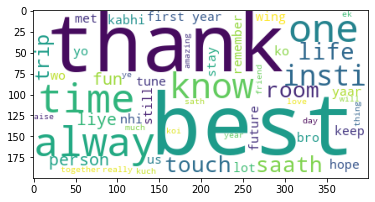

In [57]:
# Wordclouds of different granularity
from wordcloud import WordCloud, STOPWORDS
# print(STOPWORDS)
hindi_stopwords = ["mei","hai","bhi","tha","mein","aur","jab","tu","tera","se","toh","tujhe","apan","mai",
                   "tere","mujhe","kya","nahi","hi","ki",'ab',"pe","teri","ka","ke","hota","hua","jo","itna",'thoda',
                  'kaafi',"mera","ho",'p','h','u','xd']
for w in hindi_stopwords:
    STOPWORDS.add(w)

wc = WordCloud(background_color='white',
					stopwords =  set(STOPWORDS),
					max_words = 50, 
					random_state = 42,)


all_posts = []
for id in data:
#     pers = Person(**data[id])
#     if "Economics" in pers.dept:
    all_posts += [x["Text"].lower() for x in data[id]["Posts Auth"]]
wc.generate(' '.join(all_posts))
plt.imshow(wc)
plt.show()



In [ ]:
## Modularity Measures


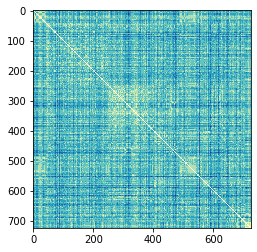

Dept   Average degree of separation
---------------------------------------
 Computer Centre  4.290055248618785
 Industrial Design Centre  3.477900552486188
 Engineering Physics  3.4454164108860232
 Mathematics  3.430110497237569
 Chemistry  3.297149673530889
 Physics  3.2509208103130756
 Civil Engineering  3.2320791663752715
 Chemical Engineering  3.162459075097197
 Economics (HSS)  3.1556169429097607
 Aerospace Engineering  3.113325440673507
 Metallurgical Engineering & Materials Science  3.1115112944961187
 Computer Science & Engineering  3.102083227735821
 Mechanical Engineering  3.101532367351193
 Electrical Engineering  3.1014937589523233
 Energy Science and Engineering  3.06470463238419


In [106]:
## Degrees of separation
all_ids = []
for id in data:
    if len(data[id]["Posts Auth"]) or len(data[id]["Posts Subj"]):
        all_ids.append(id)

shortest_paths = np.ones((len(all_ids),len(all_ids)))
shortest_paths*=10000
for i in range(len(all_ids)):
    shortest_paths[i,i] = 0


class Node:
    def __init__(self,id,parent,level):
        self.id = id
        self.index = all_ids.index(self.id)
        self.parent = parent
        self.level = level
        
## All people BFS to find degrees of separation

for start_node_ in all_ids:
    print(start_node_)
    start_node = Node(start_node_,None,0)
    queue = [start_node]
    visited = dict([(x,0) for x in all_ids])
    while True:
        node = queue.pop(0)
        visited[node.id] = 1
    #     print(data[node.id])
        edges = list(set([x["Subject"] for x in data[node.id]["Posts Auth"] if x["Subject"] in all_ids]+\
                         [x["Author"] for x in data[node.id]["Posts Subj"] if x["Author"] in all_ids]))

# Somehow optimize this code?
#         edges = [x for x in edges if shortest_paths[node.index,all_ids.index(x)]==10000]
        queue += [Node(x,node,node.level+1) for x in edges if visited[x]==0]
        parent = node.parent
        par_dist = 1
        while parent is not None:
            shortest_paths[parent.index,node.index] = min(par_dist,shortest_paths[parent.index,node.index])
            shortest_paths[node.index,parent.index] = min(par_dist,shortest_paths[node.index,parent.index])
            par_dist += 1
            parent = parent.parent
        if len(queue) == 0:
            break

np.savetxt("Degrees_of_sep.txt",shortest_paths)
json.dump(all_ids,open("Roll_list.txt","w"))

shortest_paths = np.loadtxt("Degrees_of_sep.txt")
num_ = 0

for i in range(len(shortest_paths)):
    for j in range(len(shortest_paths)):
        if shortest_paths[i,j] == 10000:
            shortest_paths[i,j] = 0    # How to handle unreachable people?

## Plotting degree of separation
plt.imshow(shortest_paths, cmap="YlGnBu", interpolation='nearest')
plt.show()

shortest_paths_sum = shortest_paths.mean(axis=1) 

path_dict = dict(zip(all_ids,shortest_paths_sum.tolist()))

# Uncomment the line below to get degree of separation stats for each person
# get_dict_stats(path_dict,desc=False)

ratio = {}
for id in path_dict:
    person = next(x for x in persons if x.id.lower() == id.lower())
    if person.dept not in ratio:
        ratio[person.dept] = [path_dict[id]]
    else:
        ratio[person.dept].append(path_dict[id]) 

print("Dept   Average degree of separation")
print("---------------------------------------")
get_dict_stats(ratio,aggregate='mean')

In [103]:
## Check what fraction of edges are double directed

In [ ]:
## See how friends of friends affect etc